In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

## 1. Các phép toán trên vector và ma trận.

### 1.1. Length of a vector

In [4]:
def compute_vector_length(vector):
    len_of_vector = np.sqrt(np.sum(vector**2))
    return len_of_vector

### 1.2. Dot product

In [5]:
def compute_dot_product(vector1, vector2):
    result = np.dot(vector1, vector2)
    return result

### 1.3. Multiplying a vector by a matrix

In [6]:
def matrix_multi_vector(matrix, vector):
    result = np.dot(matrix, vector)
    return result

### 1.4. Multiplying a matrix by a matrix

In [7]:
def matrix_multi_matrix(matrix1, matrix2):
    len_of_vector = np.dot(matrix1, matrix2)
    return len_of_vector

### 1.5 Matrix inverse

- Matrix A: 
$$ A = \begin{pmatrix} -2 & 6 \\ 8 & -4 \\ \end{pmatrix}, \quad A \in \mathbb{R}^{2 \times 2} $$
- Determinant of $A \in \mathbb{R}^{2 \times 2}$:
$$ \text{det}(A) = a*b - c*d $$
$$ \text{det}(A) = (-2*-4) - (6*8) $$
$$ \text{det}(A) = −40 $$
- Inverse Matrix:
$$ A^{-1} = \frac{1}{\text{det}(A)} \begin{pmatrix} d & -b \\ -c & a \\ \end{pmatrix} $$
$$ A^{-1} = \frac{1}{-40} \begin{pmatrix} -4 & -6 \\ -8 & -4 \\ \end{pmatrix} $$
$$ A^{-1} = \begin{pmatrix} 0.1 & 0.15 \\ 0.2 & 0.05 \\ \end{pmatrix} $$

In [8]:
def inverse_matrix(matrix):
    det_A = np.linalg.det(matrix)
    if det_A == 0:
        return None
    else:
        return np.linalg.inv(matrix) 

## 2.1 Eigenvector and eigenvalue

- Matrix 𝐴: 

$$ A = \begin{pmatrix} 0.9 & 0.2 \\ 0.1 & 0.8 \end{pmatrix} \in \mathbb{R}^{n \times n} $$

- Identity Matrix $(I)$: 

$$ I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}, \quad I \in \mathbb{R}^{n \times n} $$

- Eigenvalue $(\lambda)$: 

$$\det(A - \lambda I) = \det\left(\begin{pmatrix} 0.9 - \lambda & 0.2 \\ 0.1 & 0.8 - \lambda \end{pmatrix}\right) = 0$$

$$ \det\left(\begin{pmatrix} 0.9 - \lambda & 0.2 \\ 0.1 & 0.8 - \lambda \end{pmatrix}\right) = 
(0.9 - \lambda)(0.8 - \lambda) - (0.2)(0.1) = 0 $$

$$ \Rightarrow \lambda_1 = 1.0, \quad \lambda_2 = 0.7 $$

- Eigenvector $(v)$: 
$$ Av = \lambda v \quad \Leftrightarrow \quad (A - \lambda I)v \quad \Leftrightarrow \quad \left(\begin{pmatrix} 0.9 & 0.2 \\ 0.1 & 0.8 \end{pmatrix} - \lambda I\right)v = 0 $$
- $ \lambda_1 = 1.0 $: 
$$ (A - 1.0 I)v = \begin{pmatrix} -0.1 & 0.2 \\ 0.1 & -0.2 \end{pmatrix}v = 0 $$
$$ v_1 = \begin{pmatrix} 2 \\ 1 \end{pmatrix} $$
- $ \lambda_2 = 0.7 $: 
$$ (A - 0.7 I)v = \begin{pmatrix} 0.2 & 0.2 \\ 0.1 & 0.1 \end{pmatrix}v = 0 $$
$$ v_2 = \begin{pmatrix} -1 \\ 1 \end{pmatrix} $$

- Normalize vector:
 
$$\frac{v}{\| v \|}$$

- $ v_1 = \begin{pmatrix} 2 \\ 1 \end{pmatrix} $

$$ \|v_1\| = \sqrt{2^2 + 1^2} = \sqrt{5} $$
$$ v_1 = \frac{1}{\sqrt{5}} \begin{pmatrix} 2 \\ 1 \end{pmatrix} \approx \begin{pmatrix} 0.8944 \\ 0.4472 \end{pmatrix} $$

- $ v_2 = \begin{pmatrix} -1 \\ 1 \end{pmatrix} $

$$ \|v_2\| = \sqrt{(-1)^2 + 1^2} = \sqrt{2} $$
$$ v_2 = \frac{1}{\sqrt{2}} \begin{pmatrix} -1 \\ 1 \end{pmatrix} \approx \begin{pmatrix} -0.7071 \\ 0.7071 \end{pmatrix} $$

In [9]:
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

## 3.1. Cosine Similarity

- Data (vector x, y): 
$$ x = \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}, \quad y = \begin{bmatrix} 1 \\ 0 \\ 3 \\ 0 \end{bmatrix} $$
- Cosine Similarity: 

$$
cs(x, y) = \frac{x \cdot y}{\|x\|\|y\|} = \frac{\sum_{i=1}^{4} x_i y_i}{\sqrt{\sum_{i=1}^{4} x_i^2} \sqrt{\sum_{i=1}^{4} y_i^2}}
$$

$$
cs(x, y) = \frac{(1)(1) + (2)(0) + (3)(3) + (4)(0)}{\sqrt{(1)^2 + (2)^2 + (3)^2 + (4)^2} \sqrt{(1)^2 + (0)^2 + (3)^2 + (0)^2}}
$$

$$
cs(x, y) \approx 0.5773
$$

In [10]:
def compute_cosine(v1, v2):
    cos_sim = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return cos_sim

In [11]:
!gdown 1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07 -O data/Object.png
!gdown 1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w -O data/NewBackground.jpg
!gdown 1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ -O data/GreenBackground.png

Downloading...
From: https://drive.google.com/uc?id=1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07
To: /mnt/d/AIO2024/study_project/AIO2024_Exercises/module02/week02_vector/data/Object.png
100%|██████████████████████████████████████| 51.0k/51.0k [00:00<00:00, 1.14MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w
To: /mnt/d/AIO2024/study_project/AIO2024_Exercises/module02/week02_vector/data/NewBackground.jpg
100%|██████████████████████████████████████| 64.3k/64.3k [00:00<00:00, 1.47MB/s]
Downloading...
From: https://drive.google.com/uc?id=1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ
To: /mnt/d/AIO2024/study_project/AIO2024_Exercises/module02/week02_vector/data/GreenBackground.png
100%|██████████████████████████████████████| 5.51k/5.51k [00:00<00:00, 7.36MB/s]


## 4. Background subtraction

(a) Resize các ảnh đầu vào về cùng kích thước:

In [53]:
def plot_image(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles), start=1):
        plt.subplot(1, 3, i)
        
        if title in ['Foreground Mask', 'Segmented Object']:
            plt.imshow(image, cmap='gray')
        else:
            plt.imshow(image)

        plt.axis('off')
        plt.title(title)
    plt.show()

In [54]:
bg1_image = cv2.imread('data/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

bg2_image = cv2.imread('data/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

ob_image = cv2.imread('data/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

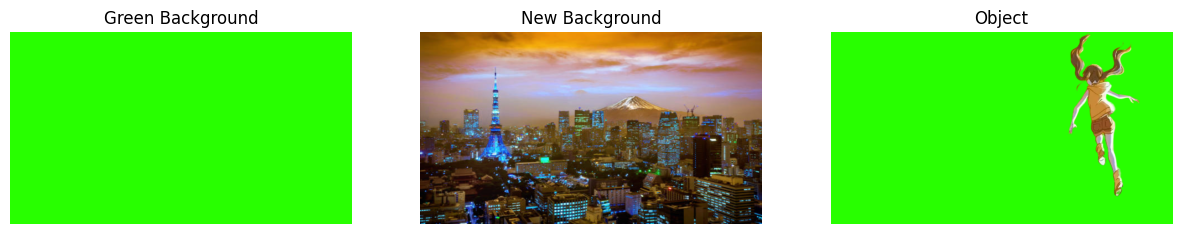

In [55]:
images = [bg1_image, bg2_image, ob_image]
titles = ['Green Background', 'New Background', 'Object']
plot_image(images, titles)

(b) Xây dựng hàm compute_difference():

In [56]:
def compute_difference(bg_img, input_img):
    difference_single_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = cv2.cvtColor(difference_single_channel, cv2.COLOR_BGR2GRAY)
    return difference_single_channel

(c) Xây dựng hàm compute_binary_mask():

In [57]:
def compute_binary_mask(difference_single_channel):
    _, difference_binary = cv2.threshold(diff_single_channel, 50, 255, cv2.THRESH_BINARY)
    return difference_binary

In [63]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    binary_mask_3channel = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
    output = np.where(binary_mask_3channel ==255 , ob_image, bg2_image)
    return diff_single_channel, binary_mask, output

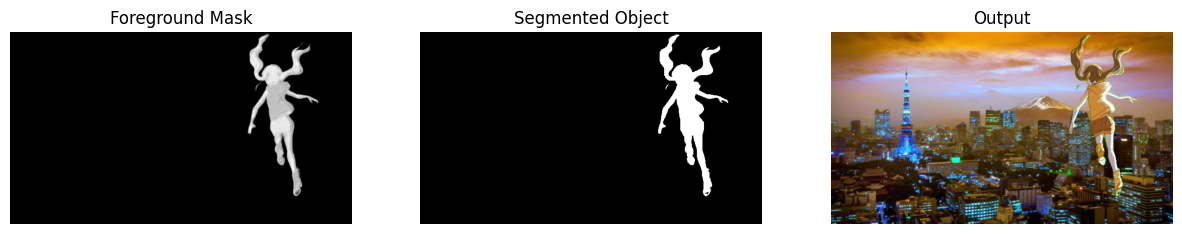

In [64]:
diff_single_channel, diff_binary, output = replace_background(bg1_image, bg2_image, ob_image)

images = [diff_single_channel, diff_binary, output]
titles = ['Foreground Mask', 'Segmented Object', 'Output']
plot_image(images, titles)